# Introduction 
 Ce projet permet d'explorer un dataset de santé et bien-être pour analyser et prédire le profil des individus à partir de variables comme l’âge, l’IMC ou le cholestérol. Après une première exploration des données, nous appliquons une normalisation pour mettre les données à la même échelle et utilisons la PCA pour réduire la dimension tout en conservant l’essentiel de l’information. Ensuite, nous entraînons plusieurs modèles de classification supervisée (KNN, Régression Logistique, Arbre de Décision) pour prédire la classe de la personne. Nous testons également le clustering non supervisé (KMeans) pour voir comment les individus se regroupent naturellement. Enfin, nous optimisons les hyperparamètres et appliquons la validation croisée pour garantir la robustesse des modèles. L’objectif est d’extraire des tendances et d’obtenir des modèles performants capables d’évaluer l’état de santé des individus avec précision.

## 1) Exploration du Dataset

In [1]:
import pandas as pd 
file_path = r"C:\Users\brice\OneDrive\Bureau\HETIC\Machine learnig\Projet\bienetre.csv"
df = pd.read_csv(file_path)
df

,target,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,...,exercice,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre
0,1,76.378818,172.472900,93.637574,2317.284189,23.187146,2.524067,24.544095,5.805570,1.0,...,4.0,6.128322,7.656376,129.058650,229.004516,4.483552,6.716421,46.007184,71.051570,4.829417
1,1,39.629339,162.527782,88.071856,2740.909189,26.742305,3.136856,26.805875,3.970287,1.0,...,1.0,6.068320,5.100178,121.038768,243.170215,4.908961,4.725666,42.880652,64.900618,5.994971
2,0,36.506832,196.457696,85.160759,3541.036636,20.895824,4.282662,24.218407,2.312967,0.0,...,3.0,6.503321,8.053128,108.250192,271.242294,7.003758,8.882047,23.152283,87.163500,8.123009
3,1,50.016190,174.829299,72.362368,3093.794975,26.155986,3.007974,23.452811,5.387465,0.0,...,3.0,6.015851,5.903230,124.828110,219.509215,4.570111,5.592381,51.413594,72.278489,6.326265
4,1,60.743330,171.536491,54.874865,2113.805284,14.771488,2.780533,26.065223,6.859302,1.0,...,3.0,5.344601,6.297733,117.464818,224.681593,5.145483,5.162349,47.531057,72.340850,4.493604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,44.259174,185.731360,75.996013,3277.506370,14.020518,2.202212,26.325467,5.306955,0.0,...,2.0,5.081386,7.333105,130.162422,226.643718,4.151228,5.832923,58.527249,57.217817,6.541393
9996,1,49.587073,148.188248,68.670612,2669.742524,24.178963,2.374592,27.673579,3.879119,2.0,...,2.0,6.305427,6.435112,135.626749,206.804862,6.097523,6.009103,37.650173,66.454937,5.832451
9997,1,43.005855,163.654787,101.187214,2671.862339,25.935762,2.211064,26.384798,3.589953,2.0,...,1.0,6.534799,7.103477,131.949677,180.608637,5.072833,5.475751,61.543553,75.861445,5.626195
9998,0,42.029230,170.503641,67.720160,3469.120538,17.492392,4.116749,25.344950,5.190215,1.0,...,4.0,8.552644,7.236787,119.782092,179.958441,8.173447,8.501297,21.193778,97.964539,7.742665


In [2]:
df.isnull().sum()

target          0
age             0
taille          0
poids           0
revenu          0
experience      0
education       0
imc             0
stress          0
nb_enfants      0
depenses        0
exercice        0
alimentation    0
sommeil         0
pression        0
cholesterol     0
activite        0
satisfaction    0
risque          0
sante           0
bienetre        0
dtype: int64

In [3]:
# Statistiques générales
df.describe()

,target,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,...,exercice,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.800000,47.978640,170.535341,74.042819,2796.214262,19.032658,3.299494,25.621232,4.598669,1.836000,...,2.626100,6.402255,7.195132,123.047003,204.035817,5.796017,6.393817,44.145412,73.824255,6.402144
std,0.748369,12.457695,10.114769,13.341103,781.533488,6.242550,0.779620,3.380089,1.807880,1.217396,...,1.543353,1.804730,1.231426,12.549389,30.366382,2.163302,1.789406,24.605016,17.215520,1.797726
min,0.000000,7.587327,129.436247,31.449135,275.978543,-6.476955,1.000000,16.595884,-0.817043,0.000000,...,0.000000,1.000000,2.773131,79.364067,113.800424,1.000000,1.000000,0.000000,16.932014,0.699666
25%,0.000000,39.405573,163.740683,64.729830,2204.563230,14.697224,2.718558,23.240084,3.197705,1.000000,...,1.000000,5.101108,6.369437,114.360830,181.995873,4.113038,5.129324,23.080978,60.948984,5.114500
50%,1.000000,47.619796,170.490729,73.192735,2757.064229,18.971618,3.278090,25.314537,4.489886,2.000000,...,3.000000,6.502440,7.214413,122.755603,202.548092,5.651046,6.484931,43.577995,76.565336,6.499488
75%,1.000000,56.637883,177.275880,82.251508,3381.817122,23.292222,3.890786,27.579416,5.882468,3.000000,...,4.000000,7.805253,8.051258,131.595146,225.125376,7.684186,7.766372,60.885159,88.778946,7.787756
max,2.000000,93.773829,214.790843,140.374368,5363.916672,40.327629,5.000000,40.608144,10.605591,7.000000,...,8.000000,10.000000,11.331989,167.334076,305.815869,10.000000,10.000000,100.000000,100.000000,10.000000


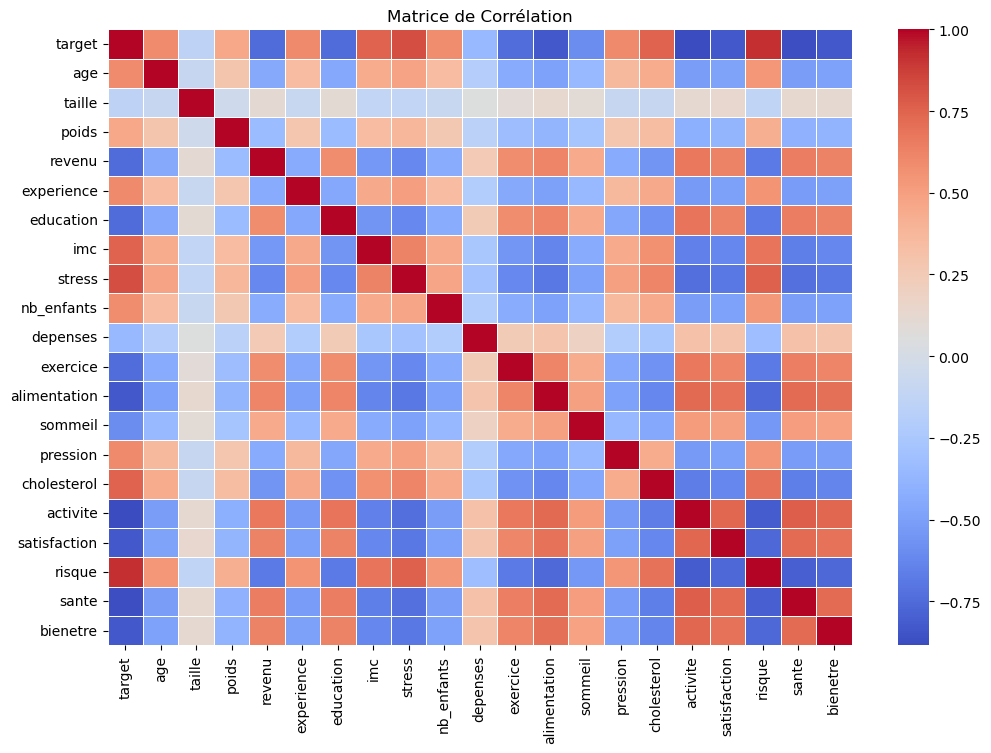

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage du heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

## 2) Normalisation de la donnée

In [5]:
from sklearn.preprocessing import StandardScaler

# Sélection des variables à normaliser (toutes sauf 'target')
features = df.drop(columns=['target'])

# Appliquer la normalisation standard
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Ajouter la colonne cible à la fin
df_normalized['target'] = df['target']

# Afficher un aperçu
df_normalized.head()

,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,depenses,...,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre,target
0,2.279844,0.191567,1.468824,-0.612839,0.665545,-0.994671,-0.318687,0.667612,-0.686746,-0.727963,...,-0.151793,0.374580,0.479063,0.822289,-0.606725,0.180294,0.075670,-0.161065,-0.874886,1
1,-0.670246,-0.791710,1.051618,-0.070768,1.235077,-0.208622,0.350494,-0.347597,-0.686746,-0.230451,...,-0.185042,-1.701328,-0.160035,1.288805,-0.410068,-0.932284,-0.051405,-0.518374,-0.226504,1
2,-0.920907,2.562951,0.833402,0.953074,0.298477,1.261149,-0.415047,-1.264363,-1.508213,2.395286,...,0.056003,0.696785,-1.179145,2.213298,0.558314,1.390604,-0.853248,0.774877,0.957294,0
3,0.163566,0.424545,-0.125967,0.380784,1.141150,-0.373944,-0.641560,0.436332,-1.508213,-0.886530,...,-0.214117,-1.049163,0.141935,0.509582,-0.566711,-0.447901,0.295409,-0.089794,-0.042210,1
4,1.024694,0.098984,-1.436831,-0.873210,-0.682635,-0.665691,0.131361,1.250496,-0.686746,-0.357642,...,-0.586075,-0.728784,-0.444839,0.679923,-0.300729,-0.688234,0.137607,-0.086171,-1.061694,1


C:\Users\brice\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brice\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


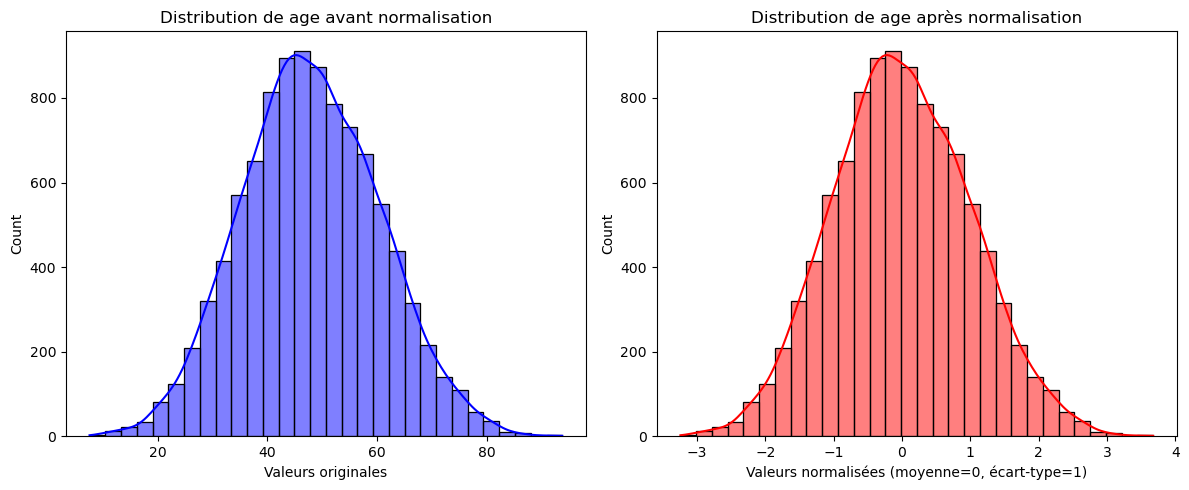

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier si la colonne existe
feature = "age"  # Modifier la colonne si nécessaire
if feature not in df.columns:
    raise ValueError(f"La colonne '{feature}' n'existe pas dans df.")

# Création des graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogramme avant normalisation
sns.histplot(df[feature], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title(f"Distribution de {feature} avant normalisation")
axes[0].set_xlabel("Valeurs originales")

# Histogramme après normalisation
sns.histplot(df_normalized[feature], bins=30, kde=True, ax=axes[1], color="red")
axes[1].set_title(f"Distribution de {feature} après normalisation")
axes[1].set_xlabel("Valeurs normalisées (moyenne=0, écart-type=1)")

plt.tight_layout()
plt.show()

## 3) Réduction de la dimensionnalité avec la PCA

In [15]:
from sklearn.decomposition import PCA
import pandas as pd

# Appliquer la PCA pour 3 composantes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_normalized.drop(columns=['target']))

# Convertir en DataFrame avec les labels
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['target'] = df_normalized['target'].astype(int)  # S'assurer que target est un entier

# Remplacer X par les nouvelles données PCA
X = df_pca.drop(columns=['target'])

# Afficher la variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_ * 100
print(f"Variance expliquée par PC1 : {explained_variance[0]:.2f}%")
print(f"Variance expliquée par PC2 : {explained_variance[1]:.2f}%")
print(f"Variance expliquée par PC3 : {explained_variance[2]:.2f}%")
print(f"Total variance expliquée par PC1 et PC2 : {explained_variance[:2].sum():.2f}%")
print(f"Total variance expliquée par PC1, PC2 et PC3 : {explained_variance.sum():.2f}%")

Variance expliquée par PC1 : 52.37%
Variance expliquée par PC2 : 4.92%
Variance expliquée par PC3 : 4.38%
Total variance expliquée par PC1 et PC2 : 57.29%
Total variance expliquée par PC1, PC2 et PC3 : 61.67%


Nombre optimal de composantes pour 95% de variance : 16
Variance totale expliquée : 95.26%


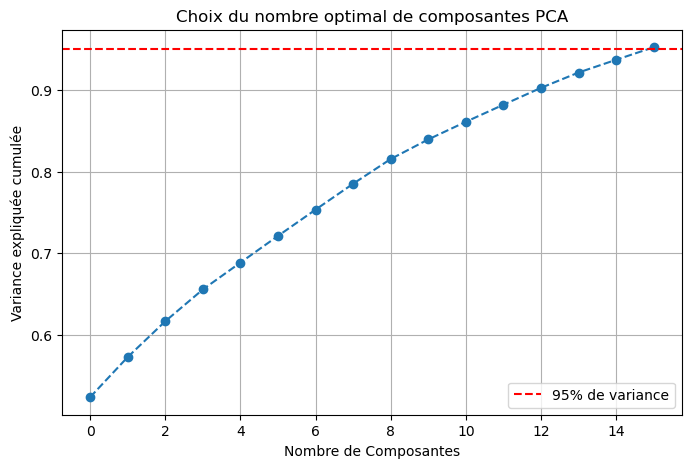

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Vérifier que X correspond aux données normalisées AVANT toute PCA
X_original = df_normalized.drop(columns=['target'])

# Appliquer PCA en gardant 95% de la variance
pca_full = PCA(n_components=0.95)
X_pca_opt = pca_full.fit_transform(X_original)

# Nombre de composantes sélectionnées
num_components = X_pca_opt.shape[1]
explained_variance = np.sum(pca_full.explained_variance_ratio_) * 100

print(f"Nombre optimal de composantes pour 95% de variance : {num_components}")
print(f"Variance totale expliquée : {explained_variance:.2f}%")

# Afficher la variance expliquée cumulée pour toutes les composantes
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Nombre de Composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Choix du nombre optimal de composantes PCA")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% de variance")
plt.legend()
plt.grid(True)
plt.show()

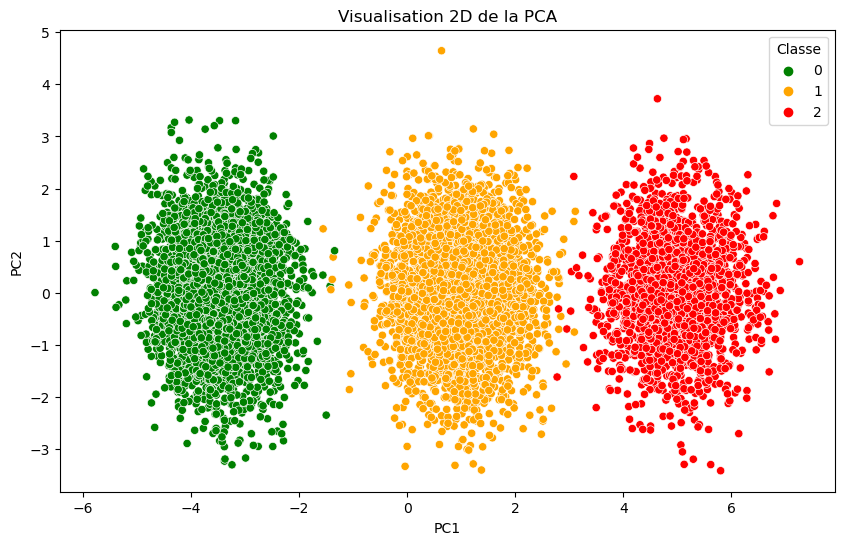

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Palette personnalisée : Vert (classe 0), Orange (classe 1), Rouge (classe 2)
custom_palette = {0: "green", 1: "orange", 2: "red"}

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer le scatterplot avec Seaborn
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="target", palette=custom_palette)

# Ajouter un titre et des labels
plt.title("Visualisation 2D de la PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Afficher la légende
plt.legend(title="Classe")

# Afficher le graphique
plt.show()

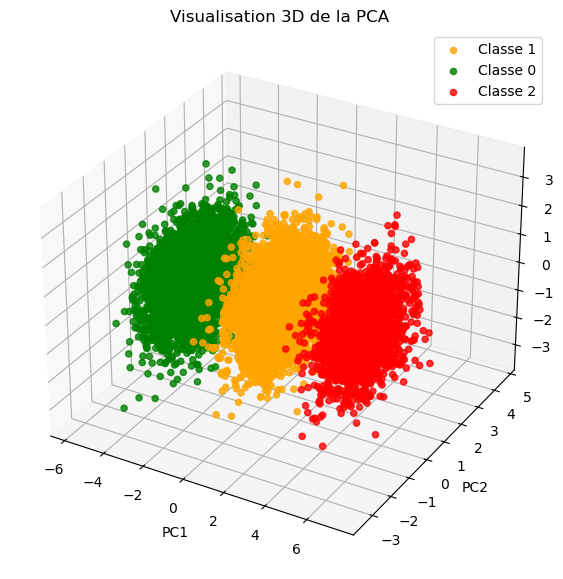

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Définition des couleurs personnalisées
colors = {0: "green", 1: "orange", 2: "red"}
df_pca["color"] = df_pca["target"].map(colors)

# Créer la figure pour le plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points 3D avec couleurs personnalisées
for target_class in df_pca["target"].unique():
    subset = df_pca[df_pca["target"] == target_class]
    ax.scatter(subset["PC1"], subset["PC2"], subset["PC3"], 
               color=colors[target_class], label=f"Classe {target_class}", alpha=0.8)

# Ajouter les titres et labels
ax.set_title("Visualisation 3D de la PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Ajouter la légende
ax.legend()

# Afficher le graphique
plt.show()

## 4) Classification supervisée

In [21]:
from sklearn.model_selection import train_test_split

# Séparation des features (X) et target (y)
X = X_pca_opt  # Données après PCA
y = df_normalized['target']  # Cible

# Séparation en données d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage de la forme des ensembles pour vérification
print(f"Train Set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test Set: X_test: {X_test.shape}, y_test: {y_test.shape}")

Train Set: X_train: (8000, 16), y_train: (8000,)
Test Set: X_test: (2000, 16), y_test: (2000,)


### a) Régression logistique

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialiser la régression logistique
logreg = LogisticRegression(max_iter=1000)

# Entraînement du modèle
logreg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Évaluation de la performance (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy sur l'ensemble de test : {accuracy:.4f}")

Accuracy sur l'ensemble de test : 0.9995


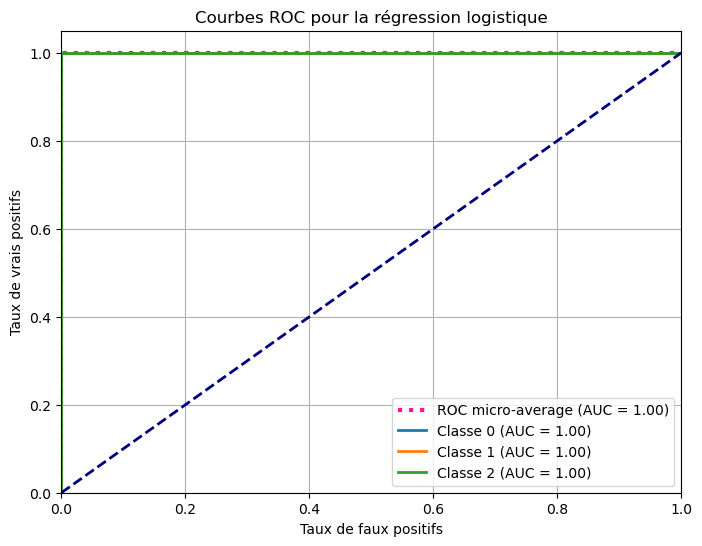

In [24]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Prédiction des probabilités pour chaque classe
y_prob = logreg.predict_proba(X_test)

# Binariser la variable cible pour le ROC multiclasse
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialisation des variables pour les courbes ROC et AUC
fpr, tpr, roc_auc = {}, {}, {}

# Calcul de la courbe ROC et AUC pour chaque classe
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcul de la courbe ROC micro-moyenne
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Affichage des courbes ROC
plt.figure(figsize=(8, 6))

# Courbe ROC micro-moyenne
plt.plot(fpr["micro"], tpr["micro"], label=f'ROC micro-average (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=3)

# Courbes ROC pour chaque classe
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

# Ajouter la ligne de hasard (diagonale)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Configuration du graphique
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC pour la régression logistique')
plt.legend(loc="lower right")
plt.grid(True)

# Affichage du graphique
plt.show()

In [25]:
# Interprétation des résultats
print("Interprétation des résultats :")
print(f"Exactitude (Accuracy) du modèle : {accuracy:.4f}")
print(f"AUC micro-average : {roc_auc['micro']:.2f}")

# Afficher l'importance des AUC pour chaque classe
for i in range(len(np.unique(y_test))):
    print(f"AUC pour la classe {i}: {roc_auc[i]:.2f}")
    
# Conclusion
print("\nConclusion :")
print("Le modèle de régression logistique a montré une performance raisonnable avec une accuracy de {:.4f}.".format(accuracy))
print("Les courbes ROC et les AUC indiquent un bon pouvoir discriminant pour chaque classe.")

Interprétation des résultats :
Exactitude (Accuracy) du modèle : 0.9995
AUC micro-average : 1.00
AUC pour la classe 0: 1.00
AUC pour la classe 1: 1.00
AUC pour la classe 2: 1.00

Conclusion :
Le modèle de régression logistique a montré une performance raisonnable avec une accuracy de 0.9995.
Les courbes ROC et les AUC indiquent un bon pouvoir discriminant pour chaque classe.


### b) K plus proches voisins (KNN) 

In [27]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle KNN et la grille de recherche pour le nombre de voisins (k)
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15, 20]}

# Appliquer GridSearchCV avec validation croisée et scoring 'accuracy'
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner le modèle et trouver le meilleur k
grid_search.fit(X_train, y_train)

# Afficher les résultats
print(f"Meilleur k : {grid_search.best_params_['n_neighbors']}")
print(f"Meilleure accuracy sur validation croisée : {grid_search.best_score_:.4f}")


Meilleur k : 11
Meilleure accuracy sur validation croisée : 0.9998


Accuracy sur l'ensemble de test : 0.9990


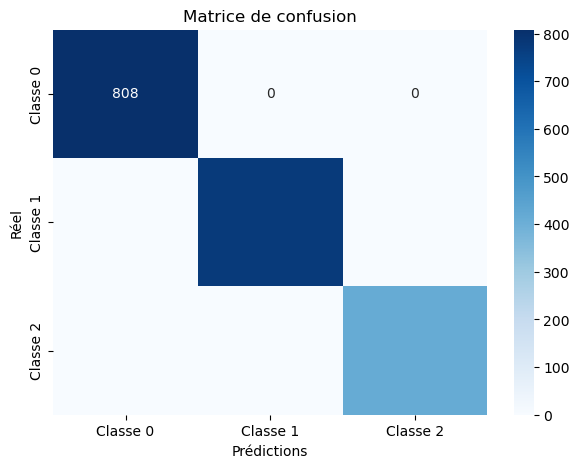

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialiser et entraîner le modèle KNN avec le meilleur k trouvé
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
best_knn.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = best_knn.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur l'ensemble de test : {accuracy:.4f}")

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], 
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

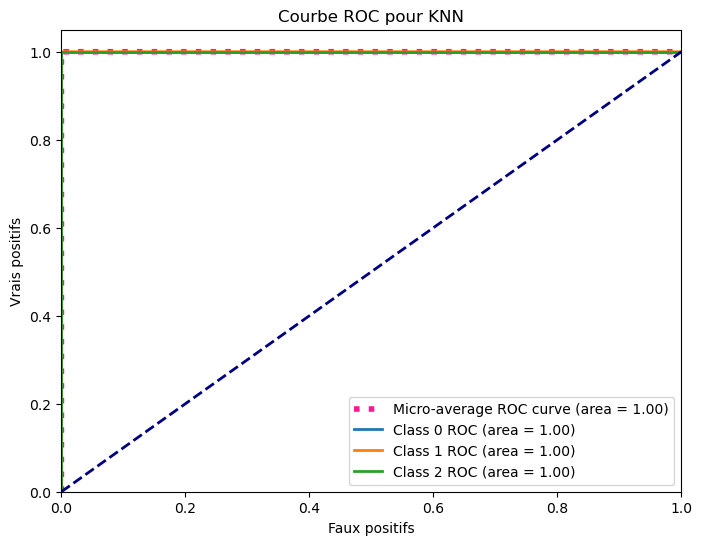

Accuracy sur l'ensemble de test : 0.9990


In [30]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np

# Prédictions de probabilité pour chaque classe
y_prob = best_knn.predict_proba(X_test)

# Binarisation de y_test pour ROC multiclasse
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Calcul des courbes ROC pour chaque classe
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Courbe ROC micro-moyenne
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))

# Courbe ROC micro-moyenne
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)

# Courbes ROC pour chaque classe
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC (area = {roc_auc[i]:.2f})')

# Diagonale (ligne aléatoire)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels et titre
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Faux positifs')
plt.ylabel('Vrais positifs')
plt.title('Courbe ROC pour KNN')
plt.legend(loc="lower right")
plt.show()

# Évaluation : Accuracy
accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print(f"Accuracy sur l'ensemble de test : {accuracy:.4f}")

### c) Arbre de décision 

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialiser le modèle d'Arbre de Décision
dt = DecisionTreeClassifier(random_state=42)

# Définir la grille de recherche pour les hyperparamètres
param_grid = {
    'max_depth': [5, 8, 9, 10, 12, 15, 20, None],
    'min_samples_split': [2, 5, 10, 12, 15],
    'min_samples_leaf': [1, 2, 5, 15, 20],
}

# Appliquer GridSearchCV avec validation croisée (5-fold)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Entraîner le modèle avec le GridSearch
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et l'accuracy correspondante
print(f"Meilleurs hyperparamètres trouvés : {grid_search.best_params_}")
print(f"Meilleure accuracy sur validation croisée : {grid_search.best_score_:.4f}")

# Évaluer le modèle avec le meilleur hyperparamètre sur l'ensemble de test
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Calculer l'accuracy sur l'ensemble de test
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur l'ensemble de test : {test_accuracy:.4f}")


Meilleurs hyperparamètres trouvés : {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Meilleure accuracy sur validation croisée : 0.9988
Accuracy sur l'ensemble de test : 0.9985


Accuracy sur l'ensemble de test : 0.9985


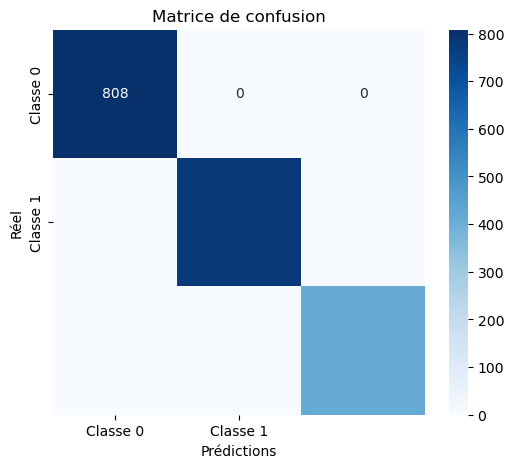

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Importation de plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialiser l'Arbre de Décision avec les meilleurs hyperparamètres trouvés
best_dt = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)

# Entraîner le modèle
best_dt.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = best_dt.predict(X_test)

# Évaluation de la performance (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur l'ensemble de test : {accuracy:.4f}")

# Analyse de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

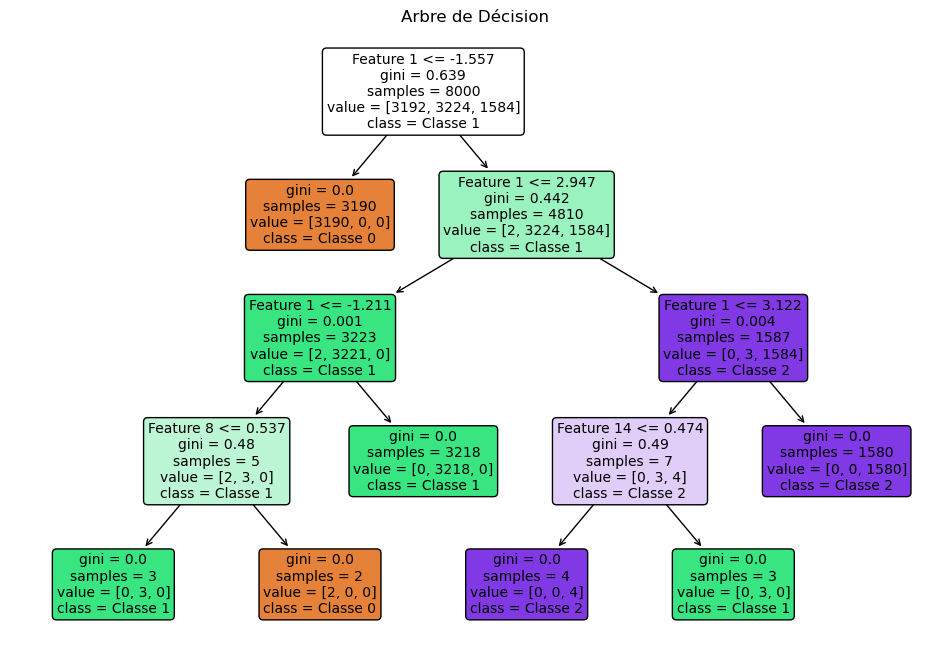

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Vérifier la dimension de X_train
num_features = X_train.shape[1]  # Récupérer le bon nombre de colonnes

# Création d'un DataFrame avec des noms de colonnes dynamiques
X_train_df = pd.DataFrame(X_train, columns=[f'Feature {i+1}' for i in range(num_features)])

# Affichage de l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(best_dt, filled=True, feature_names=X_train_df.columns, class_names=['Classe 0', 'Classe 1', 'Classe 2'], rounded=True, fontsize=10)
plt.title('Arbre de Décision')
plt.show()

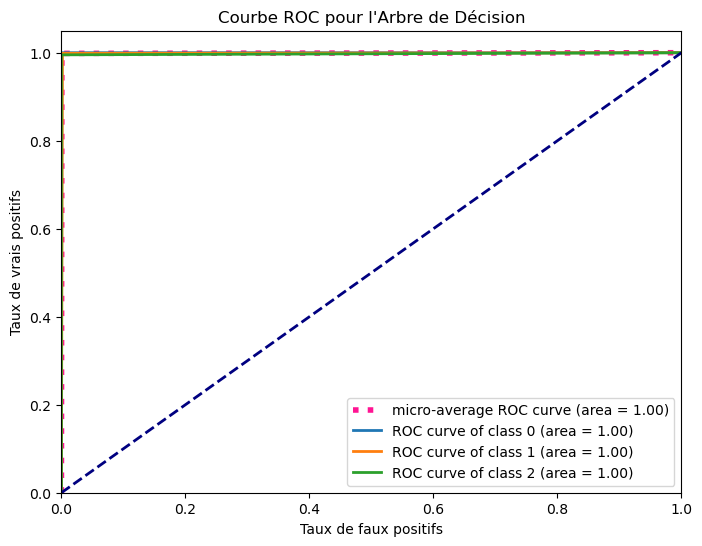

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialiser l'Arbre de Décision avec les meilleurs hyperparamètres trouvés
best_dt = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)

# Entraînement du modèle avec les meilleurs hyperparamètres
best_dt.fit(X_train, y_train)

# Obtenir les probabilités prédites pour chaque classe
y_prob = best_dt.predict_proba(X_test)

# Binariser la variable cible pour le ROC multiclasse
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcul de la courbe ROC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcul de la courbe ROC micro-moyenne et de l’aire ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Tracer les courbes ROC pour chaque classe et micro-moyenne
plt.figure(figsize=(8, 6))

# Tracer la courbe ROC micro-moyenne
plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)

# Tracer les courbes ROC pour chaque classe
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

# Tracer la diagonale (ligne aléatoire)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Ajouter les labels et le titre
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour l\'Arbre de Décision')
plt.legend(loc="lower right")
plt.show()

### d) Clustering Non Supervisé avec KMeans

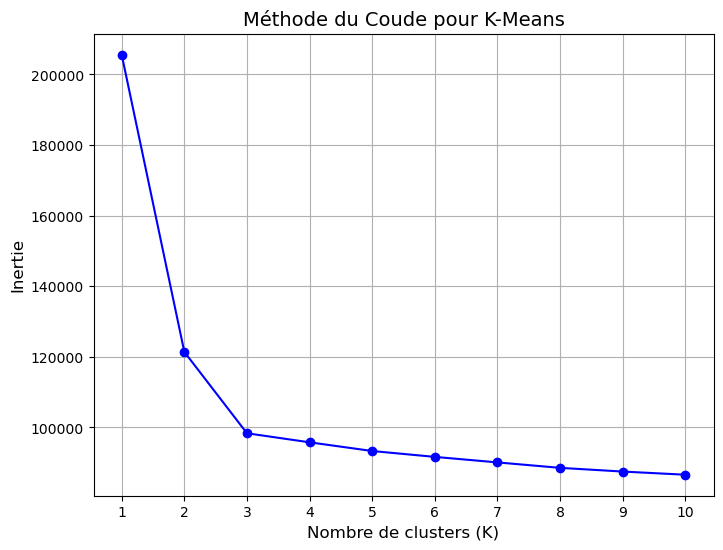

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Liste pour stocker l'inertie
inertias = []

# Tester K de 1 à 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)  # Augmenter n_init pour plus de stabilité
    kmeans.fit(df_normalized)  # Entraînement du modèle sur les données normalisées
    inertias.append(kmeans.inertia_)  # Stocker l'inertie

# Affichage du graphique de la méthode du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='-', color='b')  # Personnalisation du graphique
plt.xlabel('Nombre de clusters (K)', fontsize=12)
plt.ylabel('Inertie', fontsize=12)
plt.title('Méthode du Coude pour K-Means', fontsize=14)
plt.xticks(range(1, 11))  # Assurer que l'axe des x va de 1 à 10
plt.grid(True)
plt.show()

In [41]:
from sklearn.cluster import KMeans

# Initialisation du modèle avec K optimal (dans ce cas, K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Entraînement du modèle sur les données normalisées
df_normalized["Cluster"] = kmeans.fit_predict(df_normalized)

# Affichage des premières lignes avec les clusters assignés
print(df_normalized.head())

        age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...   sommeil  pression  cholesterol  \
0  0.667612   -0.686746 -0.727963  ...  0.374580  0.479063     0.822289   
1 -0.347597   -0.686746 -0.230451  ... -1.701328 -0.160035     1.288805   
2 -1.264363   -1.508213  2.395286  ...  0.696785 -1.179145     2.213298   
3  0.436332   -1.508213 -0.886530  ... -1.049163  0.141935     0.509582   
4  1.250496   -0.686746 -0.357642  ... -0.728784 -0.444839     0.679923   

   activite  satisfaction    risque     sante  bienetre  target  Cluster  
0 -0.